#**1. Import các thư viện cần thiết**

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

#**2. Kết nối với google driver** 





#**3. Thực hiện huấn luyện**

##3.1 Load 1 ảnh




In [ ]:
IMG_SIZE = 227

img = cv2.imread("/content/drive/MyDrive/MayHoc/Dataset/Covid-19_Detection/COVID/Covid (1).png") 
img = cv2.resize(img, (IMG_SIZE, IMG_SIZE)) 

In [ ]:
img

array([[[190, 190, 190],
        [198, 198, 198],
        [201, 201, 201],
        ...,
        [199, 199, 199],
        [193, 193, 193],
        [193, 193, 193]],

       [[189, 189, 189],
        [196, 196, 196],
        [194, 194, 194],
        ...,
        [200, 200, 200],
        [199, 199, 199],
        [189, 189, 189]],

       [[194, 194, 194],
        [200, 200, 200],
        [194, 194, 194],
        ...,
        [198, 198, 198],
        [196, 196, 196],
        [190, 190, 190]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

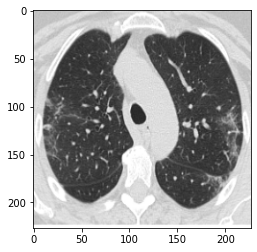

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(img)

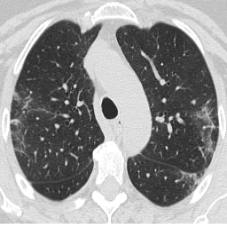

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [ ]:
img.shape

(227, 227, 3)

In [2]:
import glob
import numpy as np
import cv2

IMG_SIZE = 227

def load_dataset(path):
    X = np.array([])
    y = np.array([])
    classes = ['COVID', 'non-COVID']
    for c in classes:
        files = glob.glob(path + c + "/*.png")
        for f in files:
            print(f)
            img = cv2.imread(f) 
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            if X.size == 0:
                X = np.array([img])
            else:
                X = np.vstack([X,[img]])
            y = np.append(y, c)

    return (X,y)

In [3]:
X, y = load_dataset("/content/drive/MyDrive/MayHoc/Dataset/Covid-19_Detection/")

/content/drive/MyDrive/MayHoc/Dataset/Covid-19_Detection/COVID/Covid (1215).png
/content/drive/MyDrive/MayHoc/Dataset/Covid-19_Detection/COVID/Covid (1252).png
/content/drive/MyDrive/MayHoc/Dataset/Covid-19_Detection/COVID/Covid (1225).png
/content/drive/MyDrive/MayHoc/Dataset/Covid-19_Detection/COVID/Covid (1243).png
/content/drive/MyDrive/MayHoc/Dataset/Covid-19_Detection/COVID/Covid (1218).png
/content/drive/MyDrive/MayHoc/Dataset/Covid-19_Detection/COVID/Covid (1226).png
/content/drive/MyDrive/MayHoc/Dataset/Covid-19_Detection/COVID/Covid (1211).png
/content/drive/MyDrive/MayHoc/Dataset/Covid-19_Detection/COVID/Covid (1250).png
/content/drive/MyDrive/MayHoc/Dataset/Covid-19_Detection/COVID/Covid (1219).png
/content/drive/MyDrive/MayHoc/Dataset/Covid-19_Detection/COVID/Covid (1235).png
/content/drive/MyDrive/MayHoc/Dataset/Covid-19_Detection/COVID/Covid (1244).png
/content/drive/MyDrive/MayHoc/Dataset/Covid-19_Detection/COVID/Covid (1249).png
/content/drive/MyDrive/MayHoc/Dataset/Co

In [ ]:
print('Shape X:',X.shape)
print('Shape y:',y.shape)

Shape X: (2481, 227, 227, 3)
Shape y: (2481,)


In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(y)

IMG_SIZE = 227
X1 = X.reshape(X.shape[0], IMG_SIZE*IMG_SIZE*3)
y1 = le.transform(y)

##**3.2 Chia Dữ Liệu** 

In [5]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
print(y1_train)

['COVID' 'non-COVID' 'COVID' ... 'COVID' 'non-COVID' 'COVID']


##**3.3 Mã Hóa Dữ Liệu**

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(y1_test)
le.fit(y1_train)

IMG_SIZE = 227
X_train = X1_train.reshape(X1_train.shape[0], IMG_SIZE*IMG_SIZE*3)
X_test = X1_test.reshape(X1_test.shape[0], IMG_SIZE*IMG_SIZE*3)
y_test = le.transform(y1_test)
y_train=le.transform(y1_train)

In [8]:
y_train

array([0, 1, 0, ..., 0, 1, 0])

In [ ]:
a=0
b=0
i=0
for i in range(len(y_test)):
  if y_test[i]==0:
    a=a+1
    #print(i)
  else:
    b=b+1
print('Số nhãn COVID    :',a)
print('Số nhãn NON-COVID:',b)

Số nhãn COVID    : 374
Số nhãn NON-COVID: 371


In [ ]:
a=0
b=0
i=0
for i in y_train:
  if y_train[i]==0:
    a=a+1
  else:
    b=b+1
print('Số nhãn COVID    :',a)
print('Số nhãn NON-COVID:',b)

Số nhãn COVID    : 878
Số nhãn NON-COVID: 858


##**3.5 Tiến hành huấn luyện trên mô hình LogisticRegression** 




###**3.5.1 Huấn luyện mô hình**

In [13]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0)

model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=0)

###**3.5.2 Dự đoán trên tập test**

In [10]:
y_pred = model.predict(X_test)
print(y_pred)

[0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 1 0 1 1 0 1
 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0
 1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 1 0
 1 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 1 1 0 1 1 0
 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0
 0 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0
 0 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 1
 0 1 0 1 0 0 1 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 1 1 0 1 1 1 0
 0 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 0 1 0
 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 1 1
 1 0 1 0 0 1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1 1 1 0 0 1 1 0 1
 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 1 0 0
 1 0 0 0 1 0 0 0 1 0 1 0 

In [ ]:
print(y_test)

[0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 0 0
 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0
 1 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0
 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 1 0
 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1
 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 0
 0 1 0 0 0 1 1 0 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 1 0 1
 0 0 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0
 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 1 0
 1 1 0 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 0 1 0
 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 1
 1 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 1 0 0 1 1 0 1
 0 1 1 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 1 0 1 0 

###**3.5.3 Tính độ chính xác mô hình**

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from array import *
metrics_LS=[accuracy_score(y_test, y_pred),precision_score(y_test, y_pred),recall_score(y_test, y_pred),f1_score(y_test, y_pred, average='micro'),f1_score(y_test, y_pred, average='macro')]
print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))
print("Precision: {}".format(precision_score(y_test, y_pred)))
print("Recall: " + str(recall_score(y_test, y_pred)))
print("F1-micro: " + str(f1_score(y_test, y_pred, average='micro')))
print("F1-macro: " + str(f1_score(y_test, y_pred, average='macro')))

cf = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

Accuracy: 0.8241610738255034
Precision: 0.8141361256544503
Recall: 0.8382749326145552
F1-micro: 0.8241610738255034
F1-macro: 0.8241407954793221


In [ ]:
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       374
           1       0.81      0.84      0.83       371

    accuracy                           0.82       745
   macro avg       0.82      0.82      0.82       745
weighted avg       0.82      0.82      0.82       745



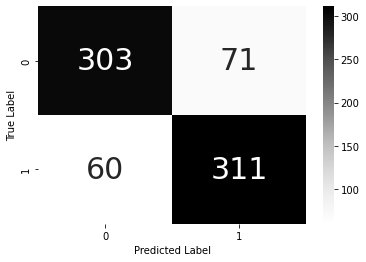

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn

sn.heatmap(cf, annot=True, cmap="Greys",fmt='g', cbar=True, annot_kws={"size": 30})
plt.title('')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

###**3.5.4 Kiểm tra lỗi**

In [ ]:
error_LS = []
for i in range(0, len(y_test)):
    if y_test[i] != y_pred[i]:
        error_LS.append(i)

In [ ]:
error_LS

[20,
 22,
 25,
 26,
 31,
 36,
 41,
 51,
 67,
 68,
 71,
 84,
 89,
 107,
 109,
 115,
 120,
 123,
 131,
 138,
 156,
 159,
 174,
 177,
 179,
 182,
 184,
 196,
 197,
 204,
 208,
 209,
 210,
 215,
 218,
 223,
 225,
 232,
 236,
 238,
 244,
 246,
 251,
 255,
 260,
 261,
 264,
 280,
 284,
 287,
 289,
 294,
 310,
 314,
 320,
 322,
 324,
 333,
 335,
 351,
 382,
 383,
 387,
 403,
 411,
 426,
 428,
 429,
 433,
 434,
 436,
 444,
 453,
 456,
 457,
 458,
 462,
 476,
 478,
 481,
 493,
 497,
 508,
 510,
 512,
 516,
 520,
 521,
 526,
 528,
 531,
 538,
 544,
 550,
 552,
 560,
 570,
 573,
 579,
 581,
 587,
 598,
 605,
 610,
 617,
 623,
 633,
 634,
 640,
 642,
 645,
 652,
 655,
 661,
 664,
 665,
 668,
 671,
 677,
 680,
 692,
 699,
 706,
 715,
 720,
 721,
 724,
 725,
 726,
 733,
 742]

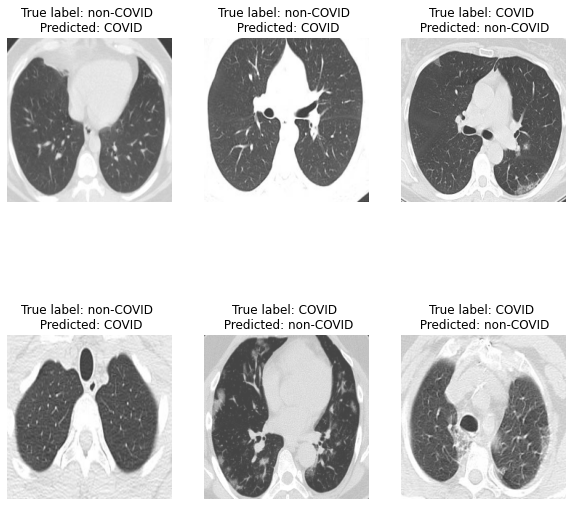

In [ ]:
import matplotlib.pyplot as plt
def invers(i):
  if i==1:
    return('COVID')
  else:
    return('NON-COVID')
plt.figure(figsize=(10, 10))
for i in range(6):
    ax = plt.subplot(2, 3, i + 1)
    plt.imshow(X1_test[error_LS[i]])
    plt.title("True label: {} \n Predicted: {}".format(le.inverse_transform([y_test[error_LS[i]]])[0], le.inverse_transform([y_pred[error_LS[i]]])[0]))
    plt.axis("off")

##**3.6 Tiến hành huấn luyện trên mô hình SVM**


###**3.6.1 Huấn luyện mô hình**

In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf', C=1E10)
clf.fit(X_train, y_train)

SVC(C=10000000000.0)

###**3.6.2 Dự đoán trên tập test**

In [ ]:
y_pred_SVM= clf.predict(X_test)
print(y_pred_SVM)

[0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1 1 0 1
 1 0 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0
 1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0
 1 0 0 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 0 1 1 0 1 1 0
 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1
 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0
 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 1 0 1
 0 0 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0
 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 1 0
 0 1 0 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0
 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 1
 1 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 0 1
 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0
 0 0 0 0 1 0 0 0 1 0 1 0 

In [ ]:
print(y_test)

[0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 0 0
 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0
 1 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0
 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 1 0
 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1
 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 0
 0 1 0 0 0 1 1 0 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 1 0 1
 0 0 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0
 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 1 0
 1 1 0 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 0 1 0
 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 1
 1 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 1 0 0 1 1 0 1
 0 1 1 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 1 0 1 0 

###**3.6.3 Tính độ chính xác của mô hình**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
metrics_SVM=[accuracy_score(y_test, y_pred_SVM),precision_score(y_test, y_pred_SVM),recall_score(y_test, y_pred_SVM),f1_score(y_test, y_pred_SVM, average='micro'),f1_score(y_test, y_pred_SVM, average='macro')]
print("Accuracy: {}".format(accuracy_score(y_test, y_pred_SVM)))
print("Precision: {}".format(precision_score(y_test, y_pred_SVM)))
print("Recall: " + str(recall_score(y_test, y_pred_SVM)))
print("F1-micro: " + str(f1_score(y_test, y_pred_SVM, average='micro')))
print("F1-macro: " + str(f1_score(y_test, y_pred_SVM, average='macro')))

cf = confusion_matrix(y_test, y_pred_SVM)
cr = classification_report(y_test, y_pred_SVM)

Accuracy: 0.9516778523489933
Precision: 0.941952506596306
Recall: 0.9622641509433962
F1-micro: 0.9516778523489933
F1-macro: 0.9516756756756757


In [ ]:
print(cr)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       374
           1       0.94      0.96      0.95       371

    accuracy                           0.95       745
   macro avg       0.95      0.95      0.95       745
weighted avg       0.95      0.95      0.95       745



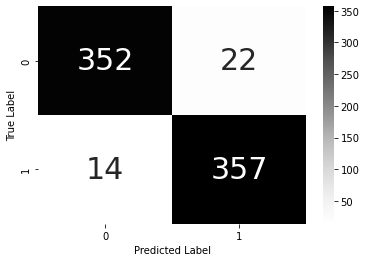

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn

sn.heatmap(cf, annot=True, cmap="Greys",fmt='g', cbar=True, annot_kws={"size": 30})
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

###**3.6.4 Kiểm tra lỗi**

In [ ]:
error_SVM = []
for i in range(0, len(y_test)):
    if y_test[i] != y_pred_SVM[i]:
        error_SVM.append(i)

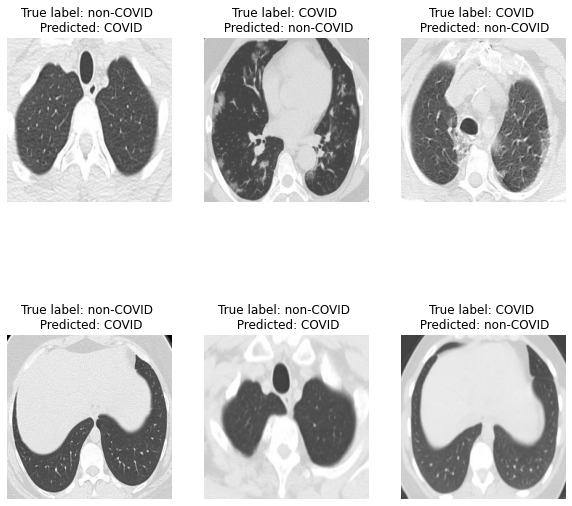

In [ ]:
import matplotlib.pyplot as plt
def invers(i):
  if i==1:
    return('COVID')
  else:
    return('NON-COVID')
plt.figure(figsize=(10, 10))
for i in range(6):
    ax = plt.subplot(2, 3, i + 1)
    plt.imshow(X1_test[error_SVM[i]])
    plt.title("True label: {} \n Predicted: {}".format(le.inverse_transform([y_test[error_SVM[i]]])[0], le.inverse_transform([y_pred_SVM[error_SVM[i]]])[0]))
    plt.axis("off")

##**3.7 Tiến hành huấn luyện trên mô hình KNN**

###**3.7.1 Huấn luyện mô hình**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)


KNeighborsClassifier()

###**3.7.2 Dự đoán trên tập test**

In [ ]:
y_pred_KNN= neigh.predict(X_test)
print(y_pred_KNN)

[0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1 1 0 1
 1 0 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0
 1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 1 0
 1 0 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0
 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1
 0 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1
 0 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 0
 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 1
 1 1 0 1 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0
 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 1 1 0 1 0 0 0 0 0 1 0 1 1
 1 0 1 0 1 1 0 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1
 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 1
 0 0 0 0 1 0 0 0 1 0 1 0 

In [ ]:
print(y_test)

[0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 0 0
 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0
 1 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0
 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 1 0
 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1
 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 0
 0 1 0 0 0 1 1 0 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 1 0 1
 0 0 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0
 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 1 0
 1 1 0 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 0 1 0
 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 1
 1 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 1 0 0 1 1 0 1
 0 1 1 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 1 0 1 0 

###**3.7.3 Tính độ chính xác của mô hình**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
metrics_KNN=[accuracy_score(y_test, y_pred_KNN),precision_score(y_test, y_pred_KNN),recall_score(y_test, y_pred_KNN),f1_score(y_test, y_pred_KNN, average='micro'),f1_score(y_test, y_pred_KNN, average='macro')]
print("Accuracy: {}".format(accuracy_score(y_test, y_pred_KNN)))
print("Precision: {}".format(precision_score(y_test, y_pred_KNN)))
print("Recall: " + str(recall_score(y_test, y_pred_KNN)))
print("F1-micro: " + str(f1_score(y_test, y_pred_KNN, average='micro')))
print("F1-macro: " + str(f1_score(y_test, y_pred_KNN, average='macro')))

cf = confusion_matrix(y_test, y_pred_KNN)
cr = classification_report(y_test, y_pred_KNN)

Accuracy: 0.8832214765100671
Precision: 0.8776595744680851
Recall: 0.889487870619946
F1-micro: 0.8832214765100671
F1-macro: 0.8832206348948959


In [ ]:
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.88      0.88       374
           1       0.88      0.89      0.88       371

    accuracy                           0.88       745
   macro avg       0.88      0.88      0.88       745
weighted avg       0.88      0.88      0.88       745



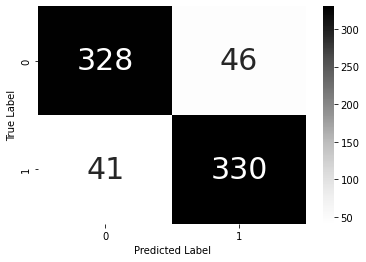

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn

sn.heatmap(cf, annot=True, cmap="Greys",fmt='g', cbar=True, annot_kws={"size": 30})
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

###**3.7.4 Kiểm tra lỗi**

In [ ]:
error_KNN = []
for i in range(0, len(y_test)):
    if y_test[i] != y_pred_KNN[i]:
        error_KNN.append(i)

In [ ]:
len(error_KNN)

87

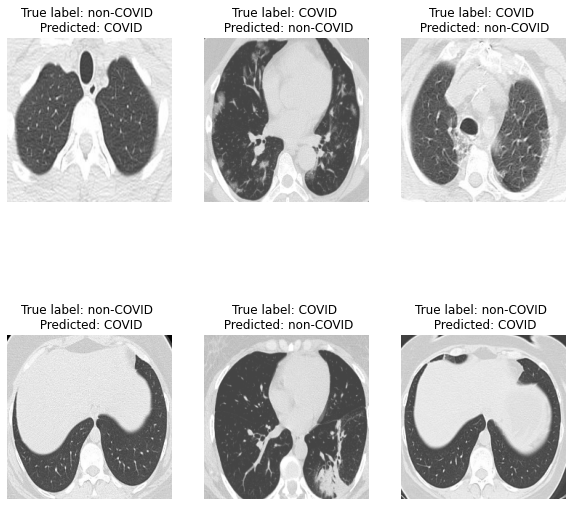

In [ ]:
import matplotlib.pyplot as plt
def invers(i):
  if i==1:
    return('COVID')
  else:
    return('NON-COVID')
plt.figure(figsize=(10, 10))
for i in range(6):
    ax = plt.subplot(2, 3, i + 1)
    plt.imshow(X1_test[error_KNN[i]])
    plt.title("True label: {} \n Predicted: {}".format(le.inverse_transform([y_test[error_KNN[i]]])[0], le.inverse_transform([y_pred_KNN[error_KNN[i]]])[0]))
    plt.axis("off")

##**3.6 Trực quan hóa độ chính xác của các mô hình**

###**3.6.1 So sánh theo từng độ đo**

No handles with labels found to put in legend.


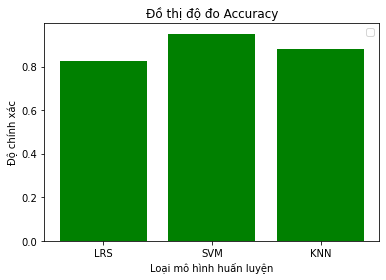

No handles with labels found to put in legend.


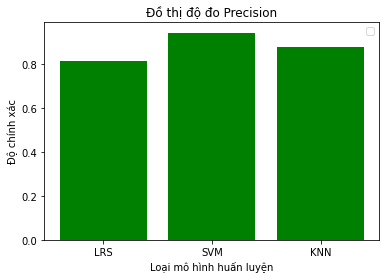

No handles with labels found to put in legend.


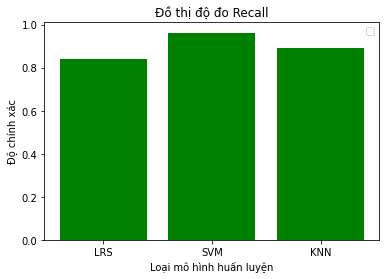

No handles with labels found to put in legend.


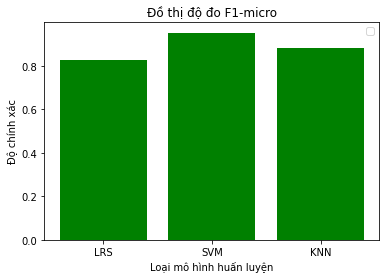

No handles with labels found to put in legend.


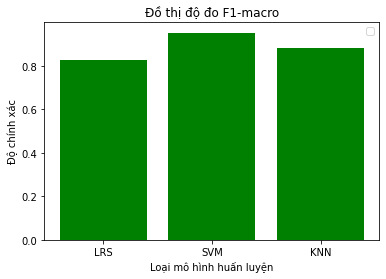

In [ ]:
import matplotlib.pyplot as plt

index=['LRS','SVM','KNN']
plt.bar(index,[metrics_LS[0],metrics_SVM[0],metrics_KNN[0]],color='green')
plt.title('Đồ thị độ đo Accuracy')
plt.xlabel('Loại mô hình huấn luyện')
plt.ylabel('Độ chính xác')
plt.legend(loc='best')
plt.show()

plt.bar(index,[metrics_LS[1],metrics_SVM[1],metrics_KNN[1]],color='green')
plt.title('Đồ thị độ đo Precision')
plt.xlabel('Loại mô hình huấn luyện')
plt.ylabel('Độ chính xác')
plt.legend(loc='best')
plt.show()

plt.bar(index,[metrics_LS[2],metrics_SVM[2],metrics_KNN[2]],color='green')
plt.title('Đồ thị độ đo Recall')
plt.xlabel('Loại mô hình huấn luyện')
plt.ylabel('Độ chính xác')
plt.legend(loc='best')
plt.show()

plt.bar(index,[metrics_LS[3],metrics_SVM[3],metrics_KNN[3]],color='green')
plt.title('Đồ thị độ đo F1-micro')
plt.xlabel('Loại mô hình huấn luyện')
plt.ylabel('Độ chính xác')
plt.legend(loc='best')
plt.show()

plt.bar(index,[metrics_LS[4],metrics_SVM[4],metrics_KNN[4]],color='green')
plt.title('Đồ thị độ đo F1-macro')
plt.xlabel('Loại mô hình huấn luyện')
plt.ylabel('Độ chính xác')
plt.legend(loc='best')
plt.show()

###**3.6.2 So sánh trên cùng 1 biểu đồ**

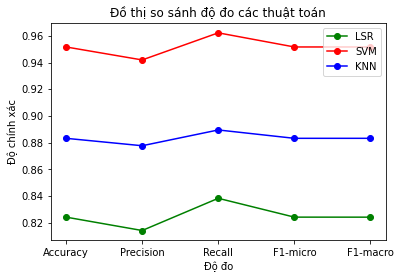

In [ ]:
index=['Accuracy','Precision','Recall','F1-micro','F1-macro']

plt.plot(index,metrics_LS, 'go-', label='LSR')
plt.plot(index, metrics_SVM, 'ro-', label='SVM')
plt.plot(index, metrics_KNN, 'bo-', label='KNN')
plt.title('Đồ thị so sánh độ đo các thuật toán')
plt.xlabel('Độ đo')
plt.ylabel('Độ chính xác')
plt.legend(loc='best')
plt.show()

#**4. Cross Validation**

##**4.1 Thực hiện trên mô hình LogisticRegression**





In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

kf = ShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

LS_avg_Ac = []
LS_avg_Pre = []
LS_avg_Recall = []
LS_avg_f1_mi = []
LS_avg_f1_mac = []
temp_Ac=0
temp_Pre=0
temp_Recall=0
temp_F1_mi=0
temp_F1_mac=0
for train_index, test_index in kf.split(X1, y1):
    X_train_LS = X1[train_index]
    y_train_LS = y1[train_index]

    X_test_LS = X1[test_index]
    y_test_LS = y1[test_index]

    model = LogisticRegression()
    model.fit(X_train_LS, y_train_LS)

    LS_CV_y_pred = model.predict(X_test_LS)
    temp_Ac=accuracy_score(y_test_LS, LS_CV_y_pred)
    temp_Pre=precision_score(y_test_LS, LS_CV_y_pred)
    temp_Recall=recall_score(y_test_LS, LS_CV_y_pred)
    temp_F1_mi=f1_score(y_test_LS, LS_CV_y_pred, average='micro')
    temp_F1_mac=f1_score(y_test_LS, LS_CV_y_pred, average='macro')
    
    
    LS_avg_Ac.append(temp_Ac)
    LS_avg_Pre.append(temp_Pre)
    LS_avg_Recall.append(temp_Recall)
    LS_avg_f1_mi.append(temp_F1_mi)
    LS_avg_f1_mac.append(temp_F1_mac)  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:

import numpy as np

AVG_ac_LS=np.mean(np.array(LS_avg_Ac))
AVG_pre_LS=np.mean(np.array(LS_avg_Pre))
AVG_recall_LS=np.mean(np.array(LS_avg_Recall))
AVG_f1_mi_LS=np.mean(np.array(LS_avg_f1_mi))
AVG_f1_mac_LS=np.mean(np.array(LS_avg_f1_mac))

print("Accuracy: {}".format(AVG_ac_LS))
print("Precision: {}".format(AVG_pre_LS))
print("Recall: {}" .format(AVG_recall_LS))
print("F1-micro: {}" .format(AVG_f1_mi_LS))
print("F1-macro: {}" .format(AVG_f1_mac_LS))


Accuracy: 0.8153020134228189
Precision: 0.7984327293366591
Recall: 0.8294665276211809
F1-micro: 0.8153020134228189
F1-macro: 0.8151392619695972


##**4.2 Thực hiện trên mô hình SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

kfsvm = ShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

SVM_avg_Ac = []
SVM_avg_Pre = []
SVM_avg_Recall = []
SVM_avg_f1_mi = []
SVM_avg_f1_mac = []
for train_index, test_index in kfsvm.split(X1, y1):
    X_train_SVM = X1[train_index]
    y_train_SVM = y1[train_index]

    X_test_SVM = X1[test_index]
    y_test_SVM = y1[test_index]

    clf = SVC(kernel='rbf', C=1E10)
    clf.fit(X_train_SVM, y_train_SVM)

    SVM_CV_y_pred = clf.predict(X_test_SVM)
    temp_Ac=accuracy_score(y_test_SVM, SVM_CV_y_pred)
    temp_Pre=precision_score(y_test_SVM, SVM_CV_y_pred)
    temp_Recall=recall_score(y_test_SVM, SVM_CV_y_pred)
    temp_F1_mi=f1_score(y_test_SVM, SVM_CV_y_pred, average='micro')
    temp_F1_mac=f1_score(y_test_SVM, SVM_CV_y_pred, average='macro')
    
    
    SVM_avg_Ac.append(temp_Ac)
    SVM_avg_Pre.append(temp_Pre)
    SVM_avg_Recall.append(temp_Recall)
    SVM_avg_f1_mi.append(temp_F1_mi)
    SVM_avg_f1_mac.append(temp_F1_mac)  

In [ ]:
import numpy as np

AVG_ac_SVM=np.mean(np.array(SVM_avg_Ac))
AVG_pre_SVM=np.mean(np.array(SVM_avg_Pre))
AVG_recall_SVM=np.mean(np.array(SVM_avg_Recall))
AVG_f1_mi_SVM=np.mean(np.array(SVM_avg_f1_mi))
AVG_f1_mac_SVM=np.mean(np.array(SVM_avg_f1_mac))

print("Accuracy: {}".format(AVG_ac_SVM))
print("Precision: {}".format(AVG_pre_SVM))
print("Recall: {}" .format(AVG_recall_SVM))
print("F1-micro: {}" .format(AVG_f1_mi_SVM))
print("F1-macro: {}" .format(AVG_f1_mac_SVM))

Accuracy: 0.9406711409395973
Precision: 0.9366049459448391
Recall: 0.9412096983953816
F1-micro: 0.9406711409395973
F1-macro: 0.9405412793276684


##**4.3 Thực hiện trên mô hình KNN**

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

kfknn = ShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

KNN_avg_Ac = []
KNN_avg_Pre = []
KNN_avg_Recall = []
KNN_avg_f1_mi = []
KNN_avg_f1_mac = []
for train_index, test_index in kfknn.split(X1, y1):
    X_train_KNN = X1[train_index]
    y_train_KNN = y1[train_index]

    X_test_KNN = X1[test_index]
    y_test_KNN = y1[test_index]

    neigh = KNeighborsClassifier()
    neigh.fit(X_train_KNN, y_train_KNN)

    KNN_CV_y_pred = neigh.predict(X_test_KNN)
    temp_Ac=accuracy_score(y_test_KNN, KNN_CV_y_pred)
    temp_Pre=precision_score(y_test_KNN, KNN_CV_y_pred)
    temp_Recall=recall_score(y_test_KNN, KNN_CV_y_pred)
    temp_F1_mi=f1_score(y_test_KNN, KNN_CV_y_pred, average='micro')
    temp_F1_mac=f1_score(y_test_KNN, KNN_CV_y_pred, average='macro')
    
    
    KNN_avg_Ac.append(temp_Ac)
    KNN_avg_Pre.append(temp_Pre)
    KNN_avg_Recall.append(temp_Recall)
    KNN_avg_f1_mi.append(temp_F1_mi)
    KNN_avg_f1_mac.append(temp_F1_mac) 

In [ ]:
import numpy as np

AVG_ac_KNN=np.mean(np.array(KNN_avg_Ac))
AVG_pre_KNN=np.mean(np.array(KNN_avg_Pre))
AVG_recall_KNN=np.mean(np.array(KNN_avg_Recall))
AVG_f1_mi_KNN=np.mean(np.array(KNN_avg_f1_mi))
AVG_f1_mac_KNN=np.mean(np.array(KNN_avg_f1_mac))

print("Accuracy: {}".format(AVG_ac_KNN))
print("Precision: {}".format(AVG_pre_KNN))
print("Recall: {}" .format(AVG_recall_KNN))
print("F1-micro: {}" .format(AVG_f1_mi_KNN))
print("F1-macro: {}" .format(AVG_f1_mac_KNN))

Accuracy: 0.8802684563758391
Precision: 0.8615176982725771
Recall: 0.8978577927757346
F1-micro: 0.8802684563758388
F1-macro: 0.8801444915735412


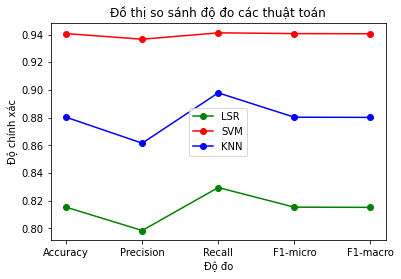

In [ ]:
index=['Accuracy','Precision','Recall','F1-micro','F1-macro']

plt.plot(index,[AVG_ac_LS,AVG_pre_LS,AVG_recall_LS,AVG_f1_mi_LS,AVG_f1_mac_LS], 'go-', label='LSR')
plt.plot(index, [AVG_ac_SVM,AVG_pre_SVM,AVG_recall_SVM,AVG_f1_mi_SVM,AVG_f1_mac_SVM], 'ro-', label='SVM')
plt.plot(index, [AVG_ac_KNN,AVG_pre_KNN,AVG_recall_KNN,AVG_f1_mi_KNN,AVG_f1_mac_KNN], 'bo-', label='KNN')
plt.title('Đồ thị so sánh độ đo các thuật toán')
plt.xlabel('Độ đo')
plt.ylabel('Độ chính xác')
plt.legend(loc='best')
plt.show()